In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Random_leak_data_by_python_new.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-09-11 01:07:51.672,39.929400,10.621079,18424.053113,1.027891,22.903695,91.492707,0
1,2024-09-11 01:08:51.672,28.772791,12.583485,19349.045753,1.062183,23.669735,90.480759,0
2,2024-09-11 01:09:51.672,40.683585,10.373292,16836.128391,1.198044,22.882568,91.501099,0
3,2024-09-11 01:10:51.672,30.132450,7.311777,13157.137992,1.147510,23.649962,91.316517,1
4,2024-09-11 01:11:51.672,43.363561,22.374388,13531.753162,1.021209,23.724924,90.813242,0


In [5]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [7]:
df.describe()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-09-11 09:27:21.672000,32.279212,15.098940,16985.253316,0.999864,23.080595,91.076086,0.258000
min,2024-09-11 01:07:51.672000,20.002799,5.000084,12008.290348,0.800623,22.344266,90.400441,0.000000
25%,2024-09-11 05:17:36.672000,25.645795,10.018130,14561.355364,0.900608,22.748368,90.717697,0.000000
50%,2024-09-11 09:27:21.672000,31.921272,15.172110,16807.068037,0.998330,23.083174,91.064813,0.000000
75%,2024-09-11 13:37:06.672000,38.703124,19.982058,19426.435195,1.104858,23.424764,91.415869,1.000000
max,2024-09-11 17:46:51.672000,44.986369,24.997440,21993.122800,1.199776,23.777052,91.814580,1.000000
std,NaN,7.381763,5.756182,2891.156689,0.117223,0.401001,0.404323,0.437753


In [9]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [11]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,39.929400,10.621079,18424.053113,1.027891
1,28.772791,12.583485,19349.045753,1.062183
2,40.683585,10.373292,16836.128391,1.198044
3,30.132450,7.311777,13157.137992,1.147510
4,43.363561,22.374388,13531.753162,1.021209


In [13]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [17]:
X_train.shape

(800, 4)

In [19]:
X_test.shape

(200, 4)

In [21]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [23]:
X_train_scaled

array([[0.86644992, 0.4360012 , 0.18844217, 0.59121496],
       [0.84313926, 0.09260726, 0.65462262, 0.0623835 ],
       [0.63440473, 0.68328105, 0.71504437, 0.13877925],
       ...,
       [0.39827878, 0.62740301, 0.87364972, 0.44882977],
       [0.46059965, 0.58472611, 0.28863769, 0.12982962],
       [0.00220662, 0.44523584, 0.60390752, 0.60050745]])

# Train a K-Nearest Neighbors (KNN) Model

In [28]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN model (with 5 neighbors as an example)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.95
Confusion Matrix:
[[149   4]
 [  5  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.91      0.89      0.90        47

    accuracy                           0.95       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.95      0.95      0.95       200



# Confusion Matrix

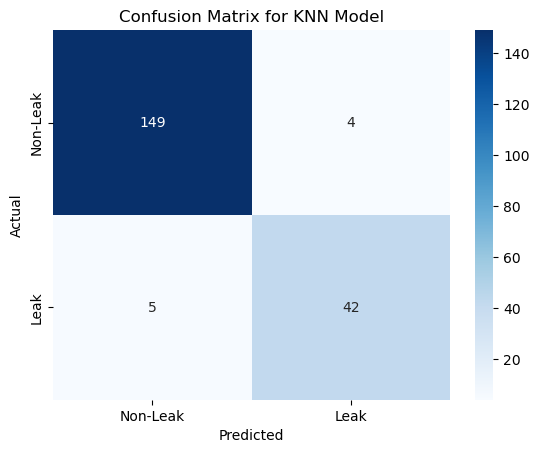

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Leak', 'Leak'], yticklabels=['Non-Leak', 'Leak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN Model')
plt.show()

# Error Analysis

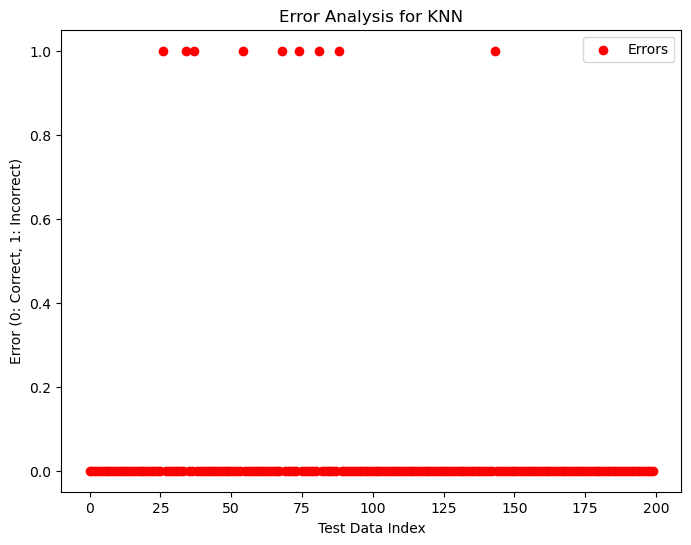

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the errors
errors = np.abs(y_test - y_pred)

# Plot error analysis
plt.figure(figsize=(8, 6))
plt.scatter(range(len(errors)), errors, color='red', label='Errors')
plt.title('Error Analysis for KNN')
plt.xlabel('Test Data Index')
plt.ylabel('Error (0: Correct, 1: Incorrect)')
plt.legend()
plt.show()


# Precision and Recall

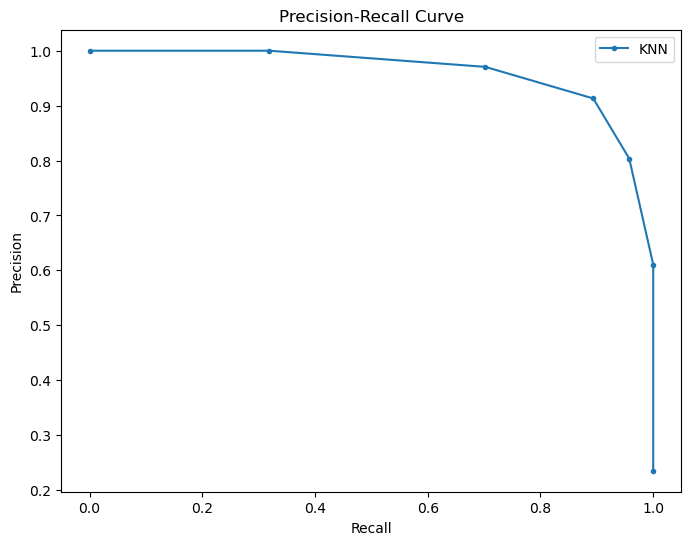

In [41]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='KNN')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Stability and Consistency

Stability and consistency relate to how well the model generalizes to unseen data.

Learning curve to show how well the model generalizes

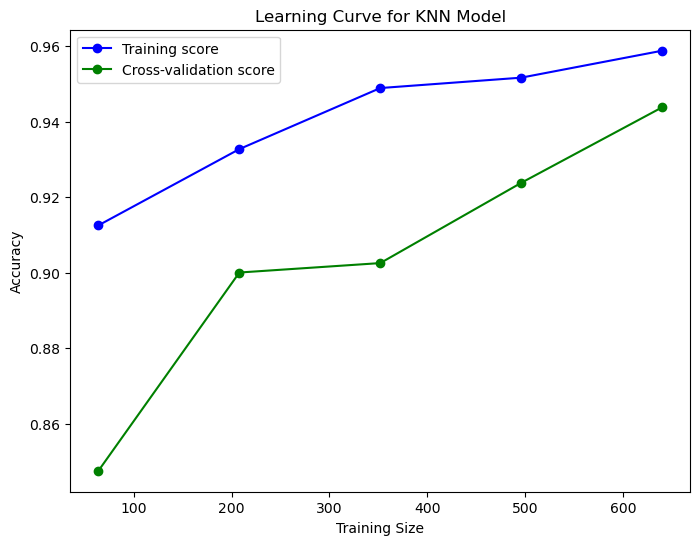

In [44]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate means and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.title('Learning Curve for KNN Model')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Visualizing the KNN decision boundaries

For visualization purposes, we'll reduce to two features (Pressure and Temperature)

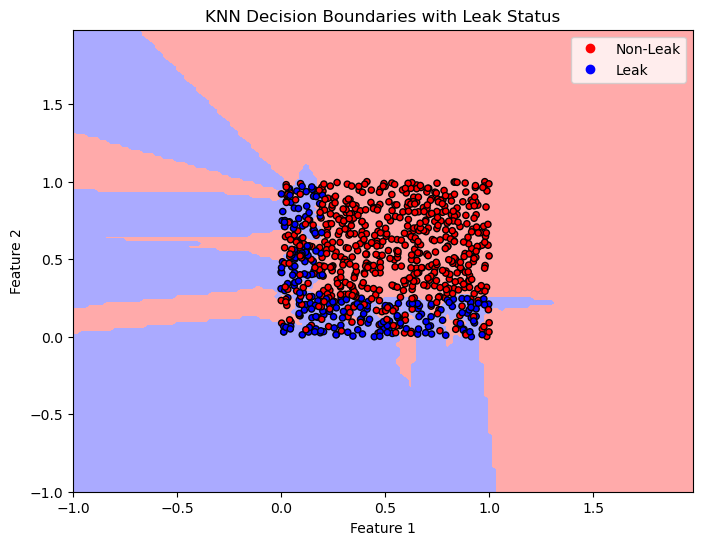

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# For visualization purposes, we'll reduce to two features
X_visualize = X_train_scaled[:, :2]  # Take only the first two features
y_visualize = y_train

# Fit KNN classifier on these two features
knn_visual = KNeighborsClassifier(n_neighbors=5)
knn_visual.fit(X_visualize, y_visualize)

# Define the decision boundary plot function with labels
def plot_decision_boundaries_with_labels(X, y, model):
    # Define colormap for background regions and data points
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']

    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary with colors for 'Leak' and 'Non-Leak'
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)

    # Create a legend with labels for 'Leak' and 'Non-Leak'
    plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Leak', 'Leak'], loc='best')

    plt.title('KNN Decision Boundaries with Leak Status')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Call the function to plot decision boundaries with leak status labels
plot_decision_boundaries_with_labels(X_visualize, y_visualize, knn_visual)


# Making prediction of leak or non-leak bu using sample gas pipeline data (Pressure, Temperature, Amplitude and Frequency) at a certain point.

In [59]:
# Sample input for Pressure, Temperature, Frequency, Amplitude
new_sample = np.array([[40, 16, 20000, 1.5]])  

# Scale the input sample using the same scaler used on the training data
new_sample_scaled = scaler.transform(new_sample)

# Make the prediction using the trained KNN model
leak_prediction = knn_model.predict(new_sample_scaled)

# Display the prediction result
if leak_prediction == 1:
    print("Prediction: Leak")
else:
    print("Prediction: Non-Leak")


Prediction: Non-Leak


C:\Users\Apu Das\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [61]:
# Sample input for Pressure, Temperature, Frequency, Amplitude
new_sample = np.array([[10, 3, 30000, 2.5]])  

# Scale the input sample using the same scaler used on the training data
new_sample_scaled = scaler.transform(new_sample)

# Make the prediction using the trained KNN model
leak_prediction = knn_model.predict(new_sample_scaled)

# Display the prediction result
if leak_prediction == 1:
    print("Prediction: Leak")
else:
    print("Prediction: Non-Leak")


Prediction: Leak


C:\Users\Apu Das\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
